<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

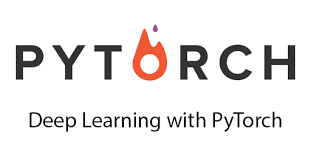

# 라이블러리 불러오기

In [0]:
import pandas as pd; from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch; import torch.nn as nn ; import torch.nn.functional as F ; from torch.autograd import Variable

In [78]:
torch.manual_seed(1)  ## 랜덤 고정 

# 데이터 불러오기

In [79]:
# load IRIS dataset
dataset = pd.read_csv('iris.csv')
dataset.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [80]:
# transform species to numerics
dataset.loc[dataset.variety=='Setosa', 'variety'] = 0
dataset.loc[dataset.variety=='Versicolor', 'variety'] = 1
dataset.loc[dataset.variety=='Virginica', 'variety'] = 2

dataset.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# 토치 텐서형 데이터로 변환

In [87]:

train_X, test_X, train_y, test_y = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.variety.values, test_size=0.5)

# 토치 모맷으로 데이터 바꾸기
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())   ## long =정수
test_y = Variable(torch.Tensor(test_y).long())

train_X[0:5]

tensor([[5.1000, 2.5000, 3.0000, 1.1000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [5.5000, 4.2000, 1.4000, 0.2000]])

# 모형설정

In [0]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #self.fc1 = nn.Linear(4, 100)       # input layer
        #self.fc2 = nn.Linear(100, 100)     # hidden layer
        self.fc3 = nn.Linear(4, 3)       # output layer
        self.softmax = nn.Softmax(dim=1)   

    def forward(self, X):                  # 활성화함수 지정
        #X = F.relu(self.fc1(X))
        #X = self.fc2(X)
        X = self.fc3(X)
        X = self.softmax(X)

        return X

In [0]:
net = Net()

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# 학습 실행

In [109]:
for epoch in range(1000):
    optimizer.zero_grad()
    hypothesis = net(train_X)      # yhat=f(X)
    loss = criterion(hypothesis, train_y)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('number of epoch=', epoch, 'loss=', loss.data)

predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)
import numpy as np;
print('===================>>>>>>')

print('test-set prediction accuracy = ', np.round(100*accuracy_score(test_y.data, predict_y.data),2), "%")

number of epoch= 0 loss= tensor(0.7680)
number of epoch= 100 loss= tensor(0.7649)
number of epoch= 200 loss= tensor(0.7620)
number of epoch= 300 loss= tensor(0.7592)
number of epoch= 400 loss= tensor(0.7565)
number of epoch= 500 loss= tensor(0.7539)
number of epoch= 600 loss= tensor(0.7513)
number of epoch= 700 loss= tensor(0.7488)
number of epoch= 800 loss= tensor(0.7465)
number of epoch= 900 loss= tensor(0.7441)
===================>>>>>>
test-set prediction accuracy =  100.0 %


In [110]:
print(list(net.parameters()))

[Parameter containing:
tensor([[ 0.5649,  1.1162, -1.3769, -0.6482],
        [ 0.4114, -0.2770,  0.0897,  0.0811],
        [-0.7857, -0.6155,  1.6574,  1.0153]], requires_grad=True), Parameter containing:
tensor([ 0.1311,  0.5314, -0.1511], requires_grad=True)]
